In [5]:
import pandas as pd 
import numpy as np 
import cv2
import matplotlib as plt 
from sklearn.svm import SVC
import os

In [37]:
def train_model_image(prodigy_task_code_03_train, Img_size=(64, 64)):
    images = []
    labels = []
    train_dir = prodigy_task_code_03_train  # use the argument as the directory

    for filename in os.listdir(path=train_dir):
        if filename.endswith('.jpg'):
            path = os.path.join(train_dir, filename)
            label = 0 if 'cat' in filename else 1
            img = cv2.imread(path)
            img = cv2.resize(img, Img_size)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_flat = img_gray.flatten() / 255.0
            images.append(img_flat)
            labels.append(label)
    return np.array(images), np.array(labels)

X, y = train_model_image('train/train')

      

  

In [38]:
X.shape


(2002, 4096)

In [39]:
#train the svm model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [42]:
y_pred = model.predict(X_val)
accuracy_score(y_val,y_pred)

0.5236907730673317

In [43]:
def load_test_image(prodigy_task_code_03_test, img_size=(64, 64)):
    test_data = []
    filenames = []
    test = prodigy_task_code_03_test
    for fname in sorted(os.listdir(test)):
        if fname.endswith('.jpg'):
            path = os.path.join(test, fname)
            img = cv2.imread(path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_flat = img.flatten() / 255.0
            test_data.append(img_flat)
            filenames.append(fname)
    return np.array(test_data), filenames

X_test, test_filenames = load_test_image('test1/test1')
test_pred = model.predict(X_test)

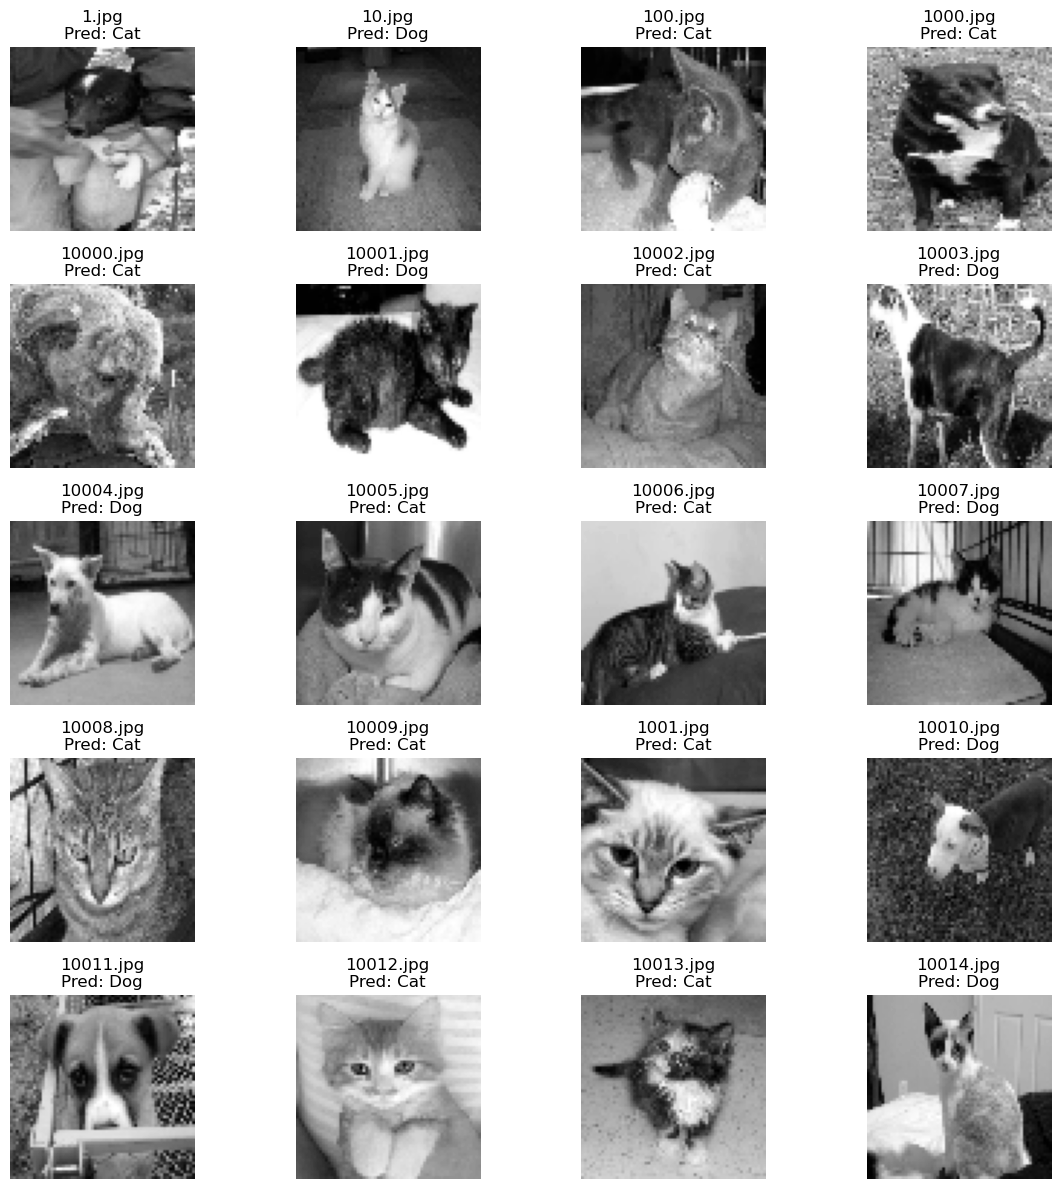

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

for i in range(20):  
    plt.subplot(5, 4, i + 1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f"{test_filenames[i]}\nPred: {'Cat' if test_pred[i]==0 else 'Dog'}")
    plt.axis('off')

plt.tight_layout()
plt.show()